# Logistic Regression 

Logistic regression is a statistical method used for binary classification problems, where the goal is to predict which of two classes a given observation belongs to. Despite its name, logistic regression is actually a classification algorithm, not a regression technique.


### Model Structure:

Logistic regression models the probability that a given input belongs to a particular class. This probability is estimated using the logistic function (or sigmoid function), which maps any real-valued number into a range between 0 and 1.

### Sigmoid Function: 

The core of logistic regression is the sigmoid function, defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-x}}
$$

where z is a linear combination of the input features (i.e., z=b+∑wixiz=b+∑​wi​xi​, where b is the bias term, wi are the weights, and xi are the feature values). The output of the sigmoid function can be interpreted as the probability of the positive class.

In [379]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

print(sigmoid(2))


0.8807970779778823



### Training:

During training, logistic regression finds the best-fitting weights and bias that maximize the likelihood of the observed data. This is typically done using a method called maximum likelihood estimation, often implemented using optimization techniques like gradient descent.

### Decision Boundary:
Once trained, the logistic regression model uses a threshold (commonly 0.5) to classify new data. If the predicted probability is greater than or equal to the threshold, the observation is classified as belonging to the positive class; otherwise, it's classified as belonging to the negative class


# 2. Logistic Regression intuition ¶


In statistics, the Logistic Regression model is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.

The Logistic Regression algorithm works as follows -
## Implement linear equation

Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.

If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation-

z = β0 + β1x1    

Here, the coefficients β0 and β1 are the parameters of the model.

If there are multiple explanatory variables, then the above equation can be extended to

z = β0 + β1x1+ β2x2+……..+ βnxn

Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by z.



## Sigmoid Function¶

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.
Sigmoid Function


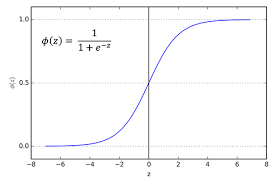

## Decision boundary

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-


# 3. Assumptions of Logistic Regression


The Logistic Regression model requires several key assumptions. These are as follows:-

- Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

- It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

- Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

- Logistic Regression model assumes linearity of independent variables and log odds.

- The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

# 4. Types of Logistic Regression


Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

### 1. Binary Logistic Regression

In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.

### 2. Multinomial Logistic Regression

In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.

### 3. Ordinal Logistic Regression

In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.

# Logistic Regression Example

## imports

In [380]:
# imports

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression,Ridge
from sklearn.metrics import classification_report
import numpy as np


Data loading 

In [381]:
# data loading 
df = pd.read_csv('data/titanic.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Defining X and Y target variables 

In [382]:
# defining x and y
y = df["Survived"]
X = df.drop("Survived", axis=1)

Test Train Split 

In [383]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [384]:
# pd.write_csv("./data/titanic_test.csv",X_train)

## Preproccesing 

Finding Null Values 

In [385]:
X_train.isna().sum()

Unnamed: 0       0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            133
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          511
Embarked         2
dtype: int64

Fill in categorical null values 

In [386]:
#entire df https://www.youtube.com/shorts/OeqpV73bNUM
# during EDA /Data cleaning
# df.fillna({"Cabin":"cabin_missing", "Embarked":"embarked_missing"}, inplace=True) 

In [387]:
# preprocessing
X_train_fill_na = X_train.copy()
X_train_fill_na.fillna({"Cabin":"cabin_missing", "Embarked":"embarked_missing"}, inplace=True)
X_train_fill_na.isna().sum()

Unnamed: 0       0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            133
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

Fill in Age with mean using imputer 

In [388]:
# During eda / Data cleaning 
df["Age"].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [389]:
# preprocessing  
 # Replace 'mean' with 'median', 'most_frequent', or 'constant'
imputer = SimpleImputer(strategy='mean')

In [390]:
X_train['Age'] = imputer.fit_transform(X_train_fill_na[['Age']])
X_train.isna().sum()

Unnamed: 0       0
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          511
Embarked         2
dtype: int64

alternative method for recommend for multicolumn 

In [391]:

imputer.fit(X_train_fill_na[["Age"]])

age_imputed = pd.DataFrame(
    imputer.transform(X_train_fill_na[["Age"]]),
    # index is important to ensure we can concatenate with other columns
    index=X_train_fill_na.index,
    columns=["Age"]
)

X_train_fill_na["Age"] = age_imputed
X_train_fill_na.isna().sum()

Unnamed: 0     0
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [392]:
X_train_fill_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 105 to 684
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   668 non-null    int64  
 1   PassengerId  668 non-null    int64  
 2   Pclass       668 non-null    object 
 3   Name         668 non-null    object 
 4   Sex          668 non-null    object 
 5   Age          668 non-null    float64
 6   SibSp        668 non-null    int64  
 7   Parch        668 non-null    int64  
 8   Ticket       668 non-null    object 
 9   Fare         668 non-null    float64
 10  Cabin        668 non-null    object 
 11  Embarked     668 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 67.8+ KB


## Dealing with Categorical Varibles

selecting all Categorical variables 

In [393]:
X_train_categorical = X_train_fill_na.select_dtypes(exclude=["int64", "float64"]).copy()
X_train_categorical

,Pclass,Name,Sex,Ticket,Cabin,Embarked
105,3,"Mionoff, Mr. Stoytcho",male,349207,cabin_missing,S
68,3,"Andersson, Miss. Erna Alexandra",female,3101281,cabin_missing,S
253,3,"Lobb, Mr. William Arthur",male,A/5. 3336,cabin_missing,S
320,3,"Dennis, Mr. Samuel",male,A/5 21172,cabin_missing,S
706,2,"Kelly, Mrs. Florence ""Fannie""",female,223596,cabin_missing,S
...,...,...,...,...,...,...
835,1,"Compton, Miss. Sara Rebecca",female,PC 17756,E49,C
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,350046,cabin_missing,S
629,3,"O'Connell, Mr. Patrick D",male,334912,cabin_missing,Q
559,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,345572,cabin_missing,S


## One Hot Encoding 

In [394]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)


Fit Transform

In [395]:
X_train_categorical_ohe=  ohe.fit_transform(X_train_categorical)

Convert to dataframe 

In [396]:
X_train_categorical_ohe_df = pd.DataFrame(
    X_train_categorical_ohe,
    index=X_train_categorical.index,
    columns=np.hstack(ohe.categories_)
)

X_train_categorical_ohe_df.head()

,1,2,3,?,"Abbing, Mr. Anthony","Abbott, Mr. Rossmore Edward","Abelson, Mrs. Samuel (Hannah Wizosky)","Adahl, Mr. Mauritz Nils Martin","Adams, Mr. John","Aks, Mrs. Sam (Leah Rosen)",...,F33,F38,F4,G6,T,cabin_missing,C,Q,S,embarked_missing
105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
253,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
320,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
706,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


altenative method

In [397]:

ohe.fit(X_train_categorical)
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    # index is important to ensure we can concatenate with other columns
    index=X_train_categorical.index,
    # we are dummying multiple columns at once, so sStoytchotack the names
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

,1,2,3,?,"Abbing, Mr. Anthony","Abbott, Mr. Rossmore Edward","Abelson, Mrs. Samuel (Hannah Wizosky)","Adahl, Mr. Mauritz Nils Martin","Adams, Mr. John","Aks, Mrs. Sam (Leah Rosen)",...,F33,F38,F4,G6,T,cabin_missing,C,Q,S,embarked_missing
105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
253,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
320,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
706,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
192,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
629,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
559,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Get Dummies

In [398]:
x_train_dummies =  pd.get_dummies(X_train_categorical[['Sex']],drop_first=False)
x_train_dummies.head()

,Sex_female,Sex_male
105,False,True
68,True,False
253,False,True
320,False,True
706,True,False


## Actual Categorical Features 

In [399]:
categorical_features = ["Sex", "Cabin", "Embarked"]
X_train_categorical = X_train_fill_na[categorical_features].copy()
X_train_categorical

,Sex,Cabin,Embarked
105,male,cabin_missing,S
68,female,cabin_missing,S
253,male,cabin_missing,S
320,male,cabin_missing,S
706,female,cabin_missing,S
...,...,...,...
835,female,E49,C
192,female,cabin_missing,S
629,male,cabin_missing,Q
559,female,cabin_missing,S


### Get Dummies 

In [400]:
x_train_dummies =  pd.get_dummies(X_train_categorical,drop_first=False,dtype="int")
x_train_dummies.head()

,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A31,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_cabin_missing,Embarked_C,Embarked_Q,Embarked_S,Embarked_embarked_missing
105,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
68,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
253,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
320,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
706,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### one hot encoder 

In [401]:
ohe.fit(X_train_categorical)

X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical),
    index=X_train_categorical.index,
    columns=np.hstack(ohe.categories_)
)
X_train_ohe

,female,male,A10,A14,A16,A19,A20,A23,A24,A31,...,F33,F38,F4,G6,T,cabin_missing,C,Q,S,embarked_missing
105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
253,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
320,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
629,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
559,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [402]:
numeric_features = [ "Age", "SibSp", "Fare"]
X_train_numeric = X_train_fill_na[numeric_features].copy()
X_train_numeric

,Age,SibSp,Fare
105,28.0,0,7.8958
68,17.0,4,7.9250
253,30.0,1,16.1000
320,22.0,0,7.2500
706,45.0,0,13.5000
...,...,...,...
835,39.0,1,83.1583
192,19.0,1,7.8542
629,29.9,0,7.7333
559,36.0,1,17.4000


In [403]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [404]:
X_train_scaled = scaler.fit_transform(X_train_numeric,)
X_train_scaled

array([[0.34451027, 0.        , 0.01541158],
       [0.20584899, 0.5       , 0.01546857],
       [0.36972142, 0.125     , 0.03142511],
       ...,
       [0.36846086, 0.        , 0.0150944 ],
       [0.44535485, 0.125     , 0.03396254],
       [0.74788857, 0.125     , 0.07612293]])

In [405]:
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)


In [406]:
X_train_scaled_df

,Age,SibSp,Fare
105,0.344510,0.000,0.015412
68,0.205849,0.500,0.015469
253,0.369721,0.125,0.031425
320,0.268877,0.000,0.014151
706,0.558805,0.000,0.026350
...,...,...,...
835,0.483172,0.125,0.162314
192,0.231060,0.125,0.015330
629,0.368461,0.000,0.015094
559,0.445355,0.125,0.033963


alternative method 

In [407]:
scaler.fit(X_train_numeric)
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric),
    # index is important to ensure we can concatenate with other columns
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)
X_train_scaled

,Age,SibSp,Fare
105,0.344510,0.000,0.015412
68,0.205849,0.500,0.015469
253,0.369721,0.125,0.031425
320,0.268877,0.000,0.014151
706,0.558805,0.000,0.026350
...,...,...,...
835,0.483172,0.125,0.162314
192,0.231060,0.125,0.015330
629,0.368461,0.000,0.015094
559,0.445355,0.125,0.033963


In [408]:
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full

,Age,SibSp,Fare,female,male,A10,A14,A16,A19,A20,...,F33,F38,F4,G6,T,cabin_missing,C,Q,S,embarked_missing
105,0.344510,0.000,0.015412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
68,0.205849,0.500,0.015469,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
253,0.369721,0.125,0.031425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
320,0.268877,0.000,0.014151,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
706,0.558805,0.000,0.026350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.483172,0.125,0.162314,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
192,0.231060,0.125,0.015330,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
629,0.368461,0.000,0.015094,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
559,0.445355,0.125,0.033963,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Model defination

In [409]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

### Model Training 

In [410]:
model_log = logreg.fit(X_train_full, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [411]:
import pickle

In [412]:

with open("model.pkl","wb") as file:
    
    model = pickle.dump(model_log,file)

In [413]:
model = None
with open("model.pkl","rb") as file:
    
    model = pickle.load(file)
    

## Model results 

In [414]:
y_hat_train = logreg.predict(X_train_full)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    566
1    102
Name: count, dtype: int64

Residuals (proportions)
0    0.847305
1    0.152695
Name: proportion, dtype: float64


### Model Validation 

In [415]:
# Filling in missing categorical data
X_test_fill_na = X_test.copy()
X_test_fill_na.fillna({"Cabin":"cabin_missing", "Embarked":"embarked_missing"}, inplace=True)

# Filling in missing numeric data
test_age_imputed = pd.DataFrame(
    imputer.transform(X_test_fill_na[["Age"]]),
    index=X_test_fill_na.index,
    columns=["Age"]
)
X_test_fill_na["Age"] = test_age_imputed

# Handling categorical data
X_test_categorical = X_test_fill_na[categorical_features].copy()
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical),
    index=X_test_categorical.index,
    columns=np.hstack(ohe.categories_)
)

# Normalization
X_test_numeric = X_test_fill_na[numeric_features].copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric),
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

# Concatenating categorical and numeric data
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)
X_test_full

,Age,SibSp,Fare,female,male,A10,A14,A16,A19,A20,...,F33,F38,F4,G6,T,cabin_missing,C,Q,S,embarked_missing
495,0.368461,0.000,0.028221,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
648,0.368461,0.000,0.014737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
278,0.079793,0.500,0.056848,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
31,0.368461,0.125,0.285990,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
255,0.357116,0.000,0.029758,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0.558805,0.125,0.054457,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
306,0.368461,0.000,0.216430,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
379,0.231060,0.000,0.015176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
742,0.256271,0.250,0.512122,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [416]:
y_hat_test = logreg.predict(X_test_full)

test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    173
1     50
Name: count, dtype: int64

Residuals (proportions)
0    0.775785
1    0.224215
Name: proportion, dtype: float64


In [417]:
print(classification_report(y_true=y_test,y_pred=y_hat_test))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       139
           1       0.68      0.75      0.72        84

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

